# Les délégués, les événements, les méthodes anonymes et les expressions lambda

- [Les délégués](#Les-délégués)
- [Les événements](#Les-événements)
- [Les méthodes anonymes](#Les-méthodes-anonymes)
  - [Lambda](#Lambda)

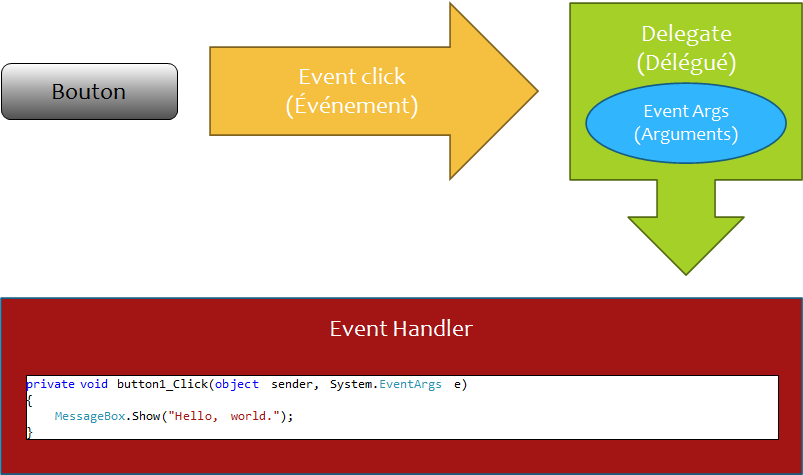

## Voici trois exemples en HTML et JavaScript

In [33]:
#!html

<button onclick="maFonction(this, { couleur: 'red' })">
  Cliquez sur moi pour changer la couleur de mon texte.
</button>

<script>
  function maFonction(sender, args) {
    const element = sender;
    element.style.color = args.couleur;
}
</script>

Cliquez sur moi pour changer la couleur de mon texte.

In [32]:
#!html

<p id="bonjour_le_monde">Bonjour le monde</p>

<button onclick="maFonction(this, { couleur: 'red' })">
  ROUGE
</button>

<button onclick="maFonction(this, { couleur: 'orange' })">
  ORANGE
</button>

<script>
  function maFonction(sender, args) {
    sender.disabled = true;
    const element = document.getElementById("bonjour_le_monde");
    element.style.color = args.couleur;
}
</script>

Bonjour le monde 

 
 ROUGE
 

 
 ORANGE

In [55]:
#!html

<p id="bonjour">...</p>

<button onclick="maFonction()">
  Bonjour le monde
</button>

<script>
  function maFonction() {
    //alert("Bonjour le monde");
    const element = document.getElementById("bonjour");
    element.innerHTML = "Bonjour le monde";
    element.style.color = "Green";
  }
</script>

... 

 
 Bonjour le monde

## Les délégués

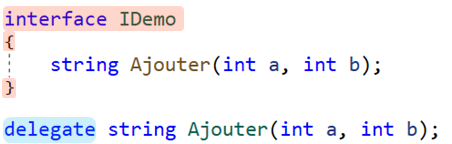

Un délégué en .NET est un type qui sert à décrire la signature d’une méthode.

À ne pas confondre « `delegate` » et « `Delegate` ».

- Le mot clé « `delegate` » est utilisé pour définir (par programmation) un <span style="color: red;">nouveau type</span> de délégué représentant une signature de méthode quelconque.
- Le type « `Delegate` » est la classe de base de tous les délégués créés à l’aide du mot clé « `delegate` ».

Le type « `Delegate` » (et non « `delegate` ») peut être utilisé pour généraliser tous les types de délégués.

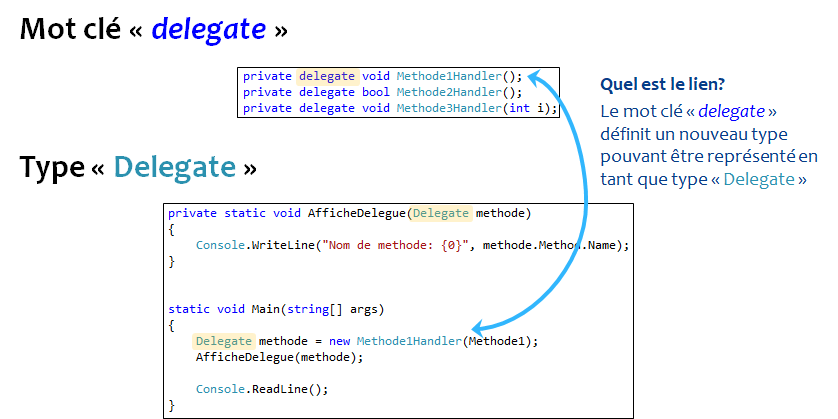

 > **En d'autres mots:**
 >
 > `delegate` est un type qui représente une signature d'une méthode. Similaire à une classe ou un a une interface.
 >
 > `Delegate` est un pointeur de fonction *fortement typé* (function pointer en C ou C++).
 >   - variable
 >   - paramètre

Un type de délégué est constitué de:

- Modificateurs d’accès optionnels
- Mot clé « `delegate` »
- Type de retour
- Nom du délégué
- Paramètres optionnels

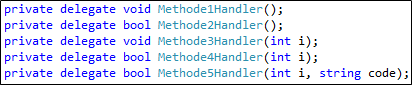

Une variable de type « `Delegate` » (donc tous les délégués définis par le programmeur) sert à stocker l’adresse d’une méthode.

« `Delegate` » peut seulement stocker l’adresse d’une méthode ayant la même signature que définit le type de délégué.

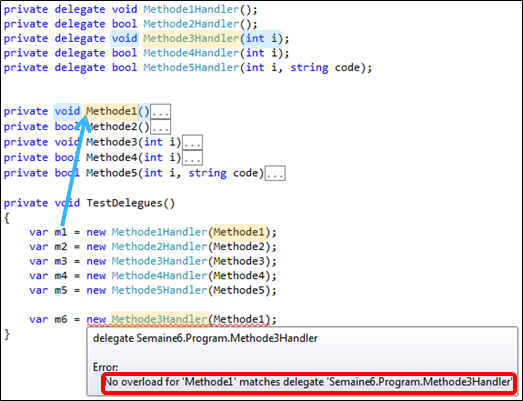

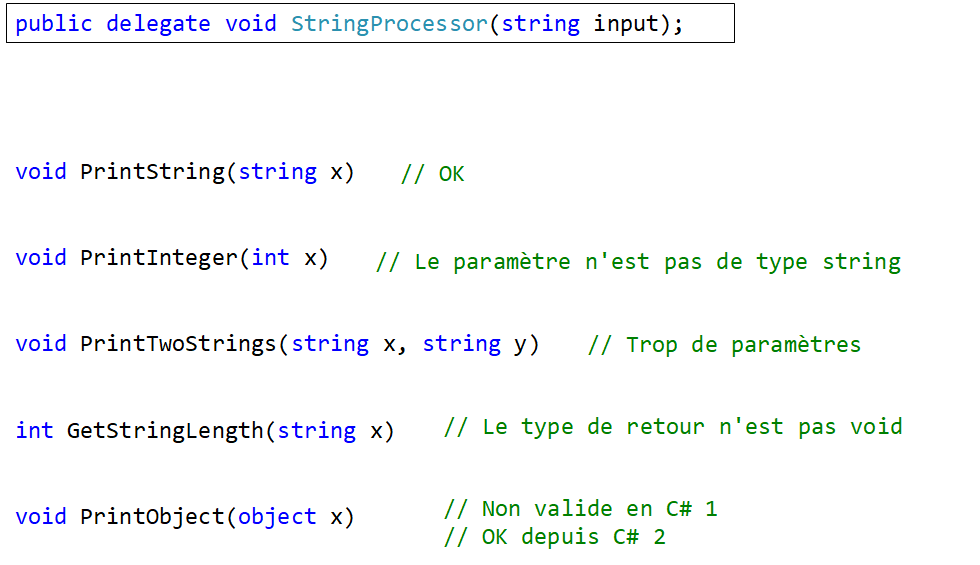

Les délégués sont souvent utilisés pour définir des méthodes de rappel (callback methods) pouvant être passées à une méthode ou stockées dans une variable.

Les délégués héritent de « `MulticastDelegate` » qui hérite de « `Delegate` »

Tous les délégués contiennent plusieurs méthodes et propriétés prédéfinies par .NET
- `Invoke(…)`: Exécute la méthode (supportant le passage de paramètres) et retourne la valeur de retour
- `BeginInvoke()`: Exécute la méthode de manière asynchrone
- `EndInvoke()`: Termine l’exécution (de manière asynchrone) et retourne la valeur de retour
- `Method`: Retourne un objet représentant la méthode pointée (par réflexion)


Afin d’utiliser un délégué pour appeler une méthode, il faut premièrement stocker l’adresse d’une méthode dans une variable de type « `Delegate` ».

L’appel du constructeur d’un délégué permet de stocker l’adresse d’une méthode en passant directement l’adresse en paramètre.

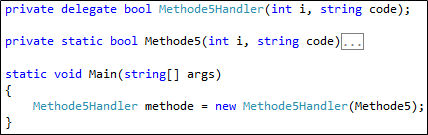

Après avoir initialisé une variable de type « `Delegate` », on peut appeler la méthode en utilisant la méthode `Invoke` (ou `BeginInvoke`/`EndInvoke`).

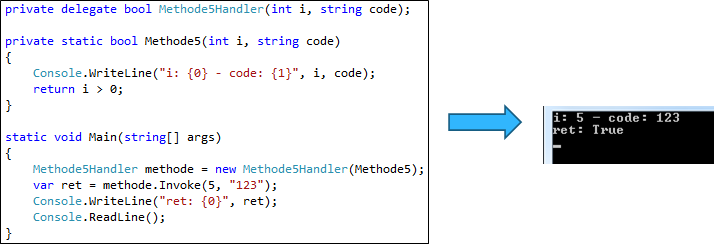

Un délégué peut également pointer à plusieurs méthodes; ce type de délégué est donc multicast.

Afin de stocker l’adresse de méthodes additionnelles, il suffit d’utiliser l’opérateur « `+=` » (et « `-=` » pour dé-enregistrer une méthode) pour spécifier les adresses additionnelles.

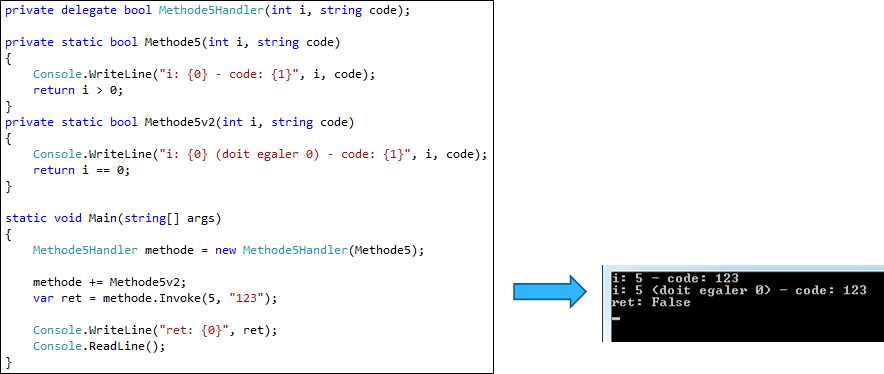

Le nom d’une méthode (method group) peut être converti implicitement à un délégué si la signature de la méthode est identique à la signature du délégué.

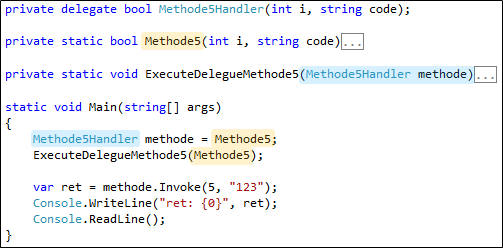

In [5]:
private delegate void Methode1Handler();
private delegate bool Methode2Handler();
private delegate void Methode3Handler(int i);
private delegate bool Methode4Handler(int i);
private delegate bool Methode5Handler(int i, string code);

private static void Methode1()
{
}

private bool Methode2()
{
    return false;
}

private void Methode3(int i)
{
}

private bool Methode4(int i)
{
    return false;
}

private static bool Methode5(int i, string code)
{
    Console.WriteLine("i: {0} (doit etre plus grand que 0) - code: {1}", i, code);
    Console.WriteLine(i > 0);
    return i > 0;
}

private static bool Methode5v2(int i, string code)
{
    Console.WriteLine("i: {0} (doit etre egale 0) - code: {1}", i, code);
    Console.WriteLine(i == 0);
    return i == 0;
}

private static void ExecuteDelegueMethode5(Methode5Handler methode)
{
    methode.Invoke(0, "");
}

var m1 = new Methode1Handler(Methode1);
var m2 = new Methode2Handler(Methode2);
var m3 = new Methode3Handler(Methode3);
var m4 = new Methode4Handler(Methode4);
var m5 = new Methode5Handler(Methode5);

//var m6 = new Methode3Handler(Methode1);

In [17]:
Methode5Handler methode = Methode5;
methode += Methode5v2;
methode += Methode5v2;
methode += Methode5;
methode += Methode5v2;

//Methode5Handler methode = Methode5v2;
//methode += Methode5;

//methode -= Methode5v2;
//methode -= Methode5v2;
////methode -= Methode5v2;

Console.WriteLine("===============================================================================");
int combienDelegue = methode.GetInvocationList().Length;
Console.WriteLine($"Nous avons {combienDelegue} délégué(s) concatèné(s)");
Console.WriteLine("===============================================================================");

//ExecuteDelegueMethode5(Methode5);

bool ret = methode.Invoke(5, "123");
Console.WriteLine("ret: {0}", ret);

Nous avons 3 délégué(s) concatèné(s)
i: 5 (doit etre plus grand que 0) - code: 123
True
i: 5 (doit etre egale 0) - code: 123
False
i: 5 (doit etre plus grand que 0) - code: 123
True
ret: True


In [5]:
// ===========================================================================
// Déclaration d'un type de delegate
// ===========================================================================
public delegate void StringProcessor(string input);

public class Personne
{
    public Personne(string nom)
    {
        if (string.IsNullOrWhiteSpace(nom))
            //throw new ArgumentNullException("nom");
            throw new ArgumentNullException(nameof(nom));

        //string s1 = "Personne";
        //string s2 = nameof(Personne);
        Nom = nom;
    }

    public string Nom { get; private set; }

    // Déclaration d'une méthode d'instance compatible
    public void Dire(string message)
    {
        //Console.WriteLine("{0} dit: {1}", Nom, message);
        Console.WriteLine($"{Nom} dit: {message}");
    }
}

public class ArrierePlan
{
    // Déclaration d'une méthode static compatible
    public static void Note(string note)
    {
        Console.WriteLine("({0})", note);
    }
}

In [6]:
// ===========================================================================
// Utilisation d'un delegate C# 1.0 / 1.1
// ===========================================================================

Personne darthVader = new Personne("Anakin");
Personne luke = new Personne("Luke");

// Création de trois instances de delegates
StringProcessor voieDeDarthVader = new StringProcessor(darthVader.Dire);
StringProcessor voieDeLuke = new StringProcessor(luke.Dire);
StringProcessor background = new StringProcessor(ArrierePlan.Note);

StringProcessor sp = new StringProcessor(Console.WriteLine);
sp("test");
//sp.Invoke("test2");
Console.WriteLine();

// Appel les instances des delegates
voieDeDarthVader.Invoke("Luke, je suis ton père.");
voieDeLuke.Invoke("Non! C'est pas vrai! C'est impossible!");
background("da-dom-da-da-da-dom-dom");

test

Anakin dit: Luke, je suis ton père.
Luke dit: Non! C'est pas vrai! C'est impossible!
(da-dom-da-da-da-dom-dom)


In [7]:
// ===========================================================================
// Utilisation d'un delegate C# +2
// Convertion implicite à l'aide des Method Group
// ===========================================================================
Personne darthVader = new Personne("Anakin");
Personne luke = new Personne("Luke");

// Création de trois instances de delegates
StringProcessor voieDeDarthVader = darthVader.Dire;
StringProcessor voieDeLuke = luke.Dire;
StringProcessor background = ArrierePlan.Note;

// Appel les instances des delegates
voieDeDarthVader("Luke, je suis ton père.");
voieDeLuke.Invoke("Non! C'est pas vrai! C'est impossible!");
background("da-dom-da-da-da-dom-dom");

//var pasPossible = ArrierePlan.Note;
var possible = new StringProcessor(ArrierePlan.Note);

Anakin dit: Luke, je suis ton père.
Luke dit: Non! C'est pas vrai! C'est impossible!
(da-dom-da-da-da-dom-dom)


In [2]:
// ===========================================================================
// Contravariance
// ===========================================================================

// TODO: démonstration dans Visual Studio

In [4]:
// ===========================================================================
// Covariance
// ===========================================================================
using System.IO;

// Déclaration d'un type de delegate qui retourne un Stream
private delegate Stream StreamFactory();

// Déclaration d'une méthode qui retourne un MemoryStream
static MemoryStream GenerateSampleData()
{
    byte[] buffer = new byte[16];
    for (int i = 0; i < buffer.Length; i++)
    {
        buffer[i] = (byte) i;
    }

    return new MemoryStream(buffer);
}

// Convertion de la méthode de façon covariant (MemoryStream à Stream)
// Retourne un type plus dérivé (covariance)
StreamFactory factory = GenerateSampleData;

// Appel du delegate pour obtenir un stream
using (Stream stream = factory())
{
    int data;
    while ((data = stream.ReadByte()) != -1)
    {
        Console.WriteLine(data);
    }
}

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [15]:
// ===========================================================================
// Faire attention, C# 1 à 2
// ===========================================================================

public delegate void UnDelegate(string x);

public class Parent
{
    public void UneAction(string x)
    {
        Console.WriteLine("Parent.UneAction");
    }
}

public class Enfant : Parent
{
    public void UneAction(object o)
    {
        Console.WriteLine("Enfant.UneAction");
    }
}

Enfant x = new Enfant();

UnDelegate factory = new UnDelegate(x.UneAction);

factory("test"); // Parent.UneAction (C# 1)
                 // Enfant.UneAction (C# 2+) Creation d'un WARNING

Enfant.UneAction


## Les événements

Un événement permet d’enregistrer une méthode avec une classe pour que celle-ci puisse appeler la méthode dans le cas où l’événement devrait être déclenché.

Un événement crée automatiquement:
1. Une variable de type « `Delegate` » (pour le délégué que vous avez spécifié) privée qui va accumuler toutes les méthodes à appeler.
1. Une façon d’enregistrer et de dé-enregistrer des méthodes à appeler.


Un événement est constitué de:
- Modificateurs d’accès optionnels
- Mot clé « `event` »
- Type de délégué
- Nom de l’événement

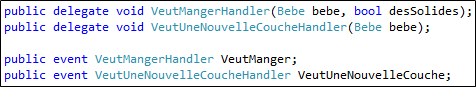

Une méthode peut être enregistrée avec l’événement en utilisant les opérateurs « `+=` », suivie du nom de la méthode.

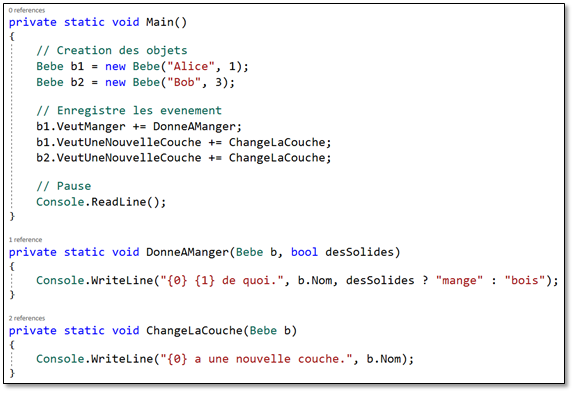

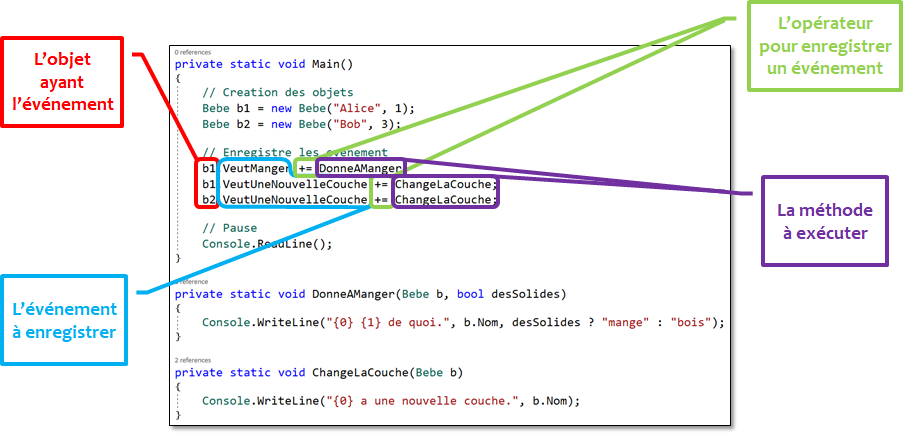

Une méthode peut être dé-enregistrée avec un événement en utilisant les opérateurs « `-=` », suivie du nom de la méthode.

Pour déclencher un événement, il suffit d’utiliser la méthode `Invoke(…)` tout comme avec un délégué.
- Il faut toujours vérifier s’il y a au moins une méthode d’enregistrée en comparant l’événement avec « `null` »

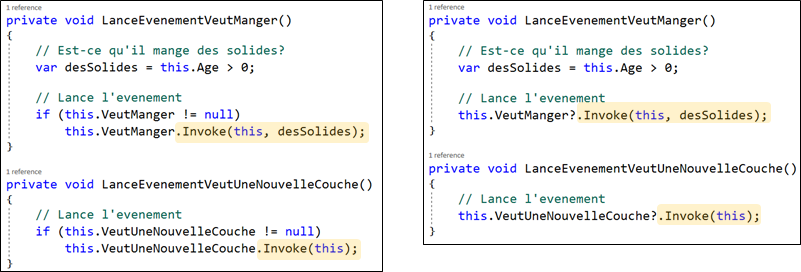

IntelliSense représente un événement avec une icône éclaire.

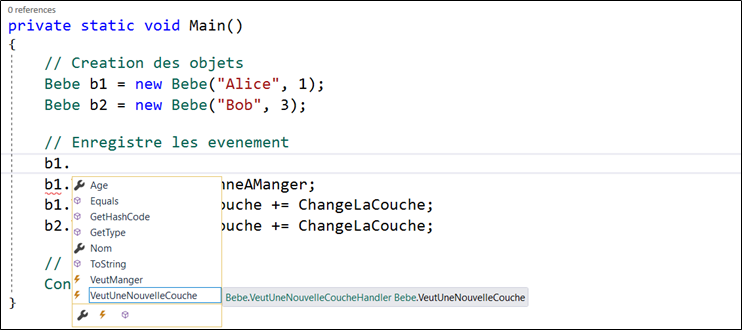

En .NET, il est fortement recommandé de toujours suivre le même modèle pour tout événement.

Le modèle recommandé est le suivant :
- Un paramètre de type « `object` » représentant l’émetteur d’événements (sender)
- Un paramètre de type héritant de « `EventArgs` » représentant des données d’événements additionnels

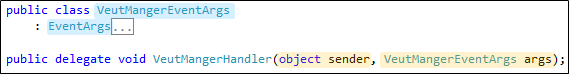

Ce modèle de base est représenté avec le délégué « `EventHandler` ».

Les classes « `EventHandler` » et « `EventHandler<TEventArgs>` » nous offre l'avantage de ne pas devoir coder notre propre délégué personnalisé.


In [25]:
// ===========================================================================
// Déclencher un événement
// ===========================================================================

//public delegate void EventHandler(object sender, EventArgs e);

public class AvecEvenements
{
    public event EventHandler KeyPress = null;
    public event EventHandler Click = delegate { }; // Shortcut avec une méthode anonyme (attention à la performance)

    // Avec vérification
    public void LanceEvenementKeyPress()
    {
        if (KeyPress != null)
            KeyPress.Invoke(this, EventArgs.Empty);

        ////KeyPress?.Invoke(this, EventArgs.Empty);
    }

    // Sans vérification
    public void LanceEvenementClick()
    {
        // On peut appeler l'événement sans vérification pour une valeur null        
        Click(this, new EventArgs());
        
        // Attention, à ne plus faire, préférer la vérification de != null
    }
}

private static void instanceDuneClasse_KeyPress(object sender, EventArgs e)
{
    Console.WriteLine("Un key-press");
}

private static void instanceDuneClasse_Click(object sender, EventArgs e)
{
    Console.WriteLine("Un click");
}

AvecEvenements instanceDuneClasse = new AvecEvenements();

instanceDuneClasse.KeyPress += instanceDuneClasse_KeyPress;
instanceDuneClasse.Click += instanceDuneClasse_Click;

instanceDuneClasse.LanceEvenementKeyPress();
instanceDuneClasse.LanceEvenementClick();

Un key-press
Un click


In [26]:
// ===========================================================================
// EventHandler générique
// ===========================================================================

// TODO: démonstration dans Visual Studio, EventHandlerGenerique

## Les méthodes anonymes

Une expression lambda est une méthode anonyme simplifiée.

Une expression lambda est habituellement utilisée pour exécuter/retourner **une** instruction.

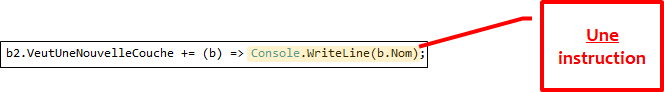

Afin de créer une expression lambda, il faut :
1. Identifier le type de retour
2. Identifier le nombre de paramètres que le délégué nécessite
3. Assigner un nom de variables pour chacun des paramètres

Vous pouvez créer une méthode complète pour vous aider à visualiser l’expression lambda

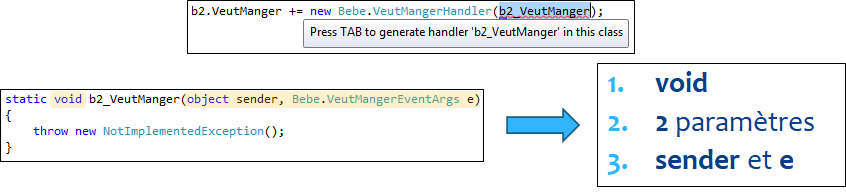

Un autre exemple…

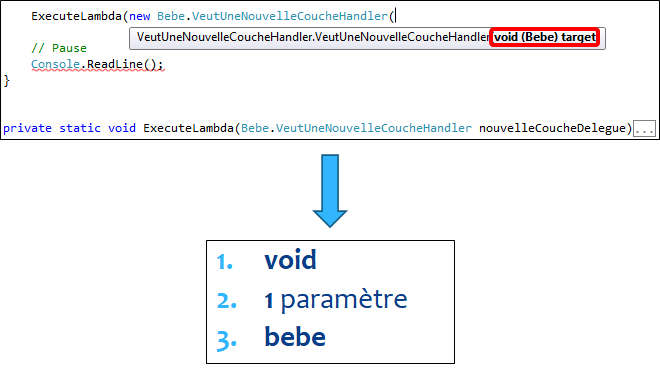

### Lambda

Avec ces informations, il est maintenant possible de créer une expression lambda

Une expression lambda simple est constituée de:
- Les **noms** de paramètres du délégué (à vous de les choisir) entre parenthèses, séparés par des virgules.
  - À noter que le type n’est pas présent.
- L’opérateur lambda « `=>` ».
- **Une** instruction.



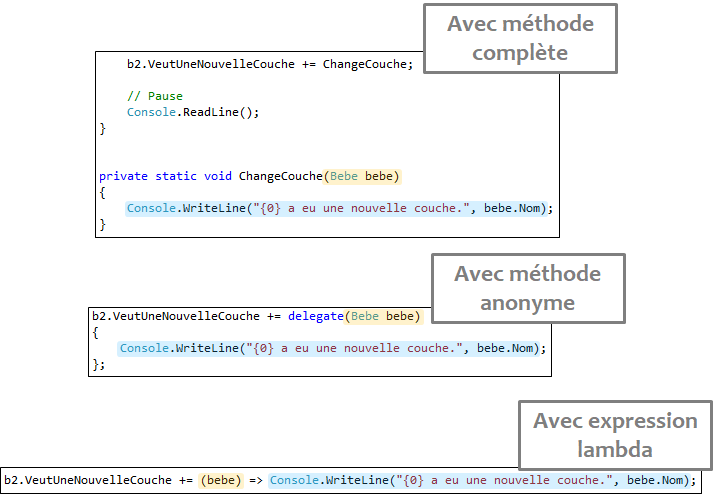

Contrairement aux méthodes, une expression lambda simple n’a pas besoin d’utiliser le mot clé « `return` » pour spécifier la valeur de retour.

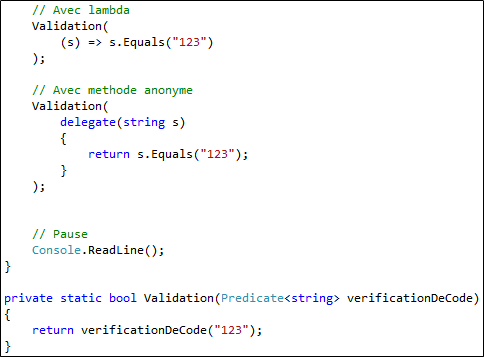

Si vous désirez utiliser une expression lambda avec plus d’une instruction, vous devez ouvrir un bloc de code à l’aide d’accolades.
 - Toute expression lambda avec un bloc de code doit utiliser le mot clé « `return` » pour spécifier la valeur de retour (s’applique seulement aux délégués ayant un type de retour) et doit avoir des points virgules après chaque instruction.

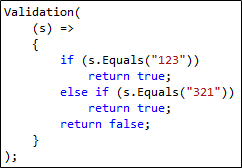

Une expression lambda représentant un délégué ayant seulement un paramètre peut être écrite sans les parenthèses.



### Voici certains exemples de methodes anonymes en JavaScript

In [1]:
#!html

<button onclick="(function () { alert('1'); })()">
  fonction conventionnelle anonyme « inline »
</button>

<br />

<button onclick="(() => alert('2'))()">
  fonction `es6 arrow` anonyme « inline »
</button>

<br />

<button onclick="fonctionConventionnelle()">
  fonction conventionnelle
</button>

<br />

<button onclick="arrowFunction()">
  fonction fléchée
</button>

<script> 
  function fonctionConventionnelle() {
    alert("fonction conventionnelle");
  }

  const arrowFunction = () => {
    alert("Une expression de fonction fléchée (arrow function en anglais)");
  };
</script>

The below script needs to be able to find the current output cell; this is an easy method to get it.

fonction conventionnelle anonyme « inline »
 

 

 alert('2'))()">
 fonction `es6 arrow` anonyme « inline »
 

 

 
 fonction conventionnelle
 

 

 
 fonction fléchée

In [29]:
// ===========================================================================
// Encapsulation de méthode
// ===========================================================================

public delegate void MonAction(string x);
//public delegate bool Predicate(string s);

public static void ExecuteActionDeStringString(Action<string, string> action)
{
    action("test ", "arg2 ");
}

MonAction a1 = Console.WriteLine;
Action<string> a2 = Console.WriteLine;
Func<string, int> f1 = s => s.Length;
Func<string, string, string> f2 =
    (s1, s2) => s1.Replace(s2, "");

Predicate<string> p1 = s => s == "123";
Func<string, bool> p2 = s => s == "123";

string result = f2.Invoke("abc", "b"); // "ac"


string test = "bonjour";

//Action<string, string> a = (s1, s2) => Console.WriteLine(s1 + s2 + test);
////a("hello", "world");
//test += "1234567890";
//ExecuteActionDeStringString(a);
//return;
////Action<string> b = Console.WriteLine;
////b("hello");
////return;

//Action<string> retourneVoid = delegate(string texte) { Console.WriteLine(texte); };

//retourneVoid = texte => Console.WriteLine(texte);

//retourneVoid("");

Predicate<string> returnBool = delegate { return true; };
returnBool = texte => texte == "123";

Func<string, int> returneInt = delegate(string texte) { return 100; };

In [43]:
// ===========================================================================
// Fermeture ou clôture (en anglais : closure)
// https://fr.wikipedia.org/wiki/Fermeture_(informatique)
// ===========================================================================

/*
Une fermeture est la paire formée d'une fonction et des références à son état
environnant (l'environnement lexical). En d'autres termes, une fermeture donne
accès à la portée d'une fonction externe à partir d'une fonction interne (on
dit aussi que la fonction « capture son environnement »).
  - https://developer.mozilla.org/fr/docs/Web/JavaScript/Closures
*/

public static Func<int, int, bool> CreerFonction()
{
    int i = 0; // la variable capturée
    
    Func<int, int, bool> sontEgal = (int x, int y) =>
        {
            i++;
            Console.WriteLine("i={0}", i);
            return x == y;
        };

    return sontEgal;
}

var egal = CreerFonction();
bool resultat1 = egal(10, 20);
bool resultat2 = egal(10, 20);
egal(10, 20);
egal(10, 20);

i=1
i=2
i=3
i=4


In [42]:
// ===========================================================================
// Delegate to Lambda
// ===========================================================================

Func<string, int> retourneLaLongeur;

retourneLaLongeur = delegate(string texte) { return texte.Length; };
Console.WriteLine(retourneLaLongeur("Bonjour"));

retourneLaLongeur = (string texte) => { return texte.Length; };
Console.WriteLine(retourneLaLongeur("Bonjour"));

retourneLaLongeur = (string texte) => texte.Length;
Console.WriteLine(retourneLaLongeur("Bonjour"));

retourneLaLongeur = (texte) => texte.Length;
Console.WriteLine(retourneLaLongeur("Bonjour"));

retourneLaLongeur = texte => texte.Length;
Console.WriteLine(retourneLaLongeur("Bonjour"));

7
7
7
7
7
